In [1]:
import pandas as pd
import numpy as np
import platform as pf
import os
import xlrd

from matplotlib import pyplot as plt
from datetime import datetime
from matplotlib.ticker import MultipleLocator, FormatStrFormatter

In [2]:
pd.set_option("max_row",1000)
pd.set_option("max_column",10)

In [3]:
# create folder for result
if not os.path.exists("../result/time-series/"):
    os.makedirs("../result/time-series/")

In [4]:
# get range of COVID-19 data

covidDP = "../data/covid-19/time_series_covid19_confirmed_global_modified.csv"
covidDF = pd.read_csv(covidDP)
covidDF["Date"] = pd.to_datetime(covidDF["Date"], format = "%Y-%m-%d")
date = covidDF["Date"].tolist()

In [5]:
#define all FP and corresponding excluded directories
dataFP = "../data/market/"
energies_dir = "Commodities/Energies"
grains_dir = "Commodities/Grains"
meats_dir = "Commodities/Meats"
metals_dir = "Commodities/Metals"
softs_dir = "Commodities/Softs"
crypto_dir = "Cryptocurrencies"
currencies_dir = "Currencies"
funds_dir = "Funds_ETFs"
index_dir = "Index"

energies_excluded_dir = ["CrudeOil_CL.csv", "CrudeOil_WTI_macrotrends.csv"]
index_excluded_dir = ["NASDAQ_100_Tech.csv", "NASDAQ_100_Index.csv",
                              "NASDAQ_100_ExTech.csv", "CBOE_VolatilityIndex.csv"]


In [6]:
def PlotImage(root_dir, date, excluded_dir = None):
    markerStyle = ['.', ',', 'o', 'v', '^', '1', 'p', 'P', '*', '+']

    plt.figure(figsize=(12, 8))
    plt.title(root_dir)
        
    plotNumber = 0
    for root, dirs, files in os.walk(dataFP + root_dir):
        for file in files:
            path = dataFP + root_dir + '/' + file
            if not path.endswith('.csv') or (excluded_dir is not None and file in excluded_dir):
                continue
                
            indicatorData = pd.read_csv(path)
            indicatorData["Date"] = pd.to_datetime(indicatorData["Date"], format = "%Y-%m-%d")
            indicatorData.sort_values('Date', inplace=True, ascending=True)

            # Only keep data within the range of the covid data
            indicatorData = indicatorData[(indicatorData["Date"] >= date[0]) & (indicatorData["Date"] <= date[-1])]
            indicatorData = indicatorData[["Date", "Close/Last"]]

            indicatorDate = indicatorData["Date"].tolist()
            indicatorDate = [str(each) for each in indicatorDate]
            indicatorDate = [each[:10] for each in indicatorDate]
            
            indicatorValue = indicatorData["Close/Last"].values
            base = indicatorValue[0]
            new_indicatorValue = []
            for each in indicatorValue:
                if each / base < 1:
                    new_indicatorValue.append(-100.0 * (1 - each / base))
                else:
                    new_indicatorValue.append(100.0 * (each / base - 1))
            
            plt.plot(indicatorDate, new_indicatorValue, label=file[:-4], linewidth = 1, linestyle = "--", marker = markerStyle[plotNumber % 10], markersize = 3)
            plt.xticks(indicatorDate[::10], rotation = -30)
            plt.yticks([-50, -40, -30, -20, -10, 0, 10, 20, 30, 40, 50], ['-50%', '-40%', '-30%', '-20%', '-10%', '0%', '10%', '20%', '30%', '40%', '50%'])
            plt.legend()
            plt.axhline(y = 0, color='c', linestyle='-', linewidth = 1)
            plt.xlabel('Date')
            plt.ylabel('Rise/Fall Percentage')
            
            plotNumber = plotNumber + 1

        root_dir = root_dir.replace("/", "_")
        picName = "../result/time-series/" + root_dir + ".png"
        plt.savefig(picName)

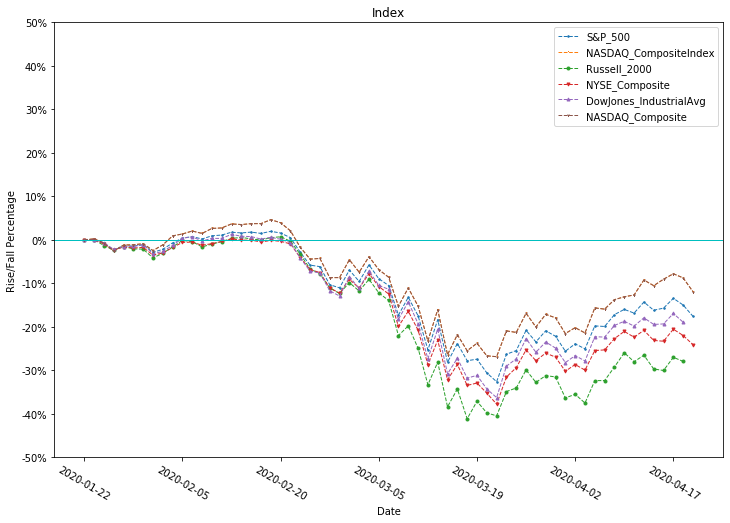

In [7]:
PlotImage(index_dir, date, index_excluded_dir)

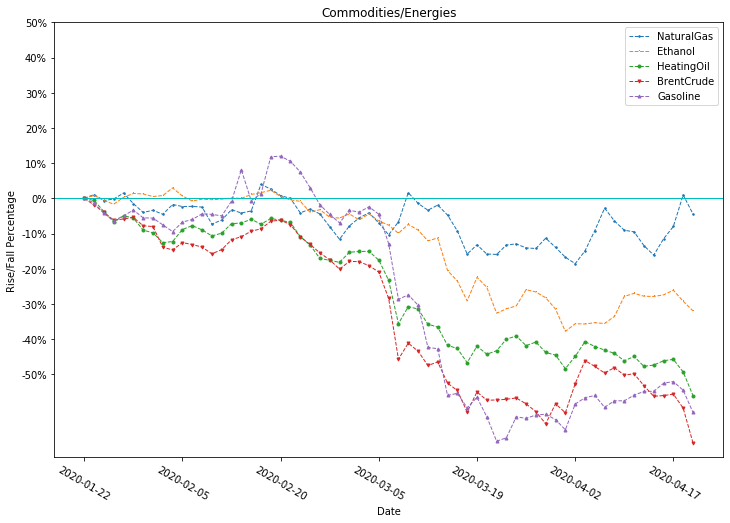

In [8]:
PlotImage(energies_dir, date, energies_excluded_dir)

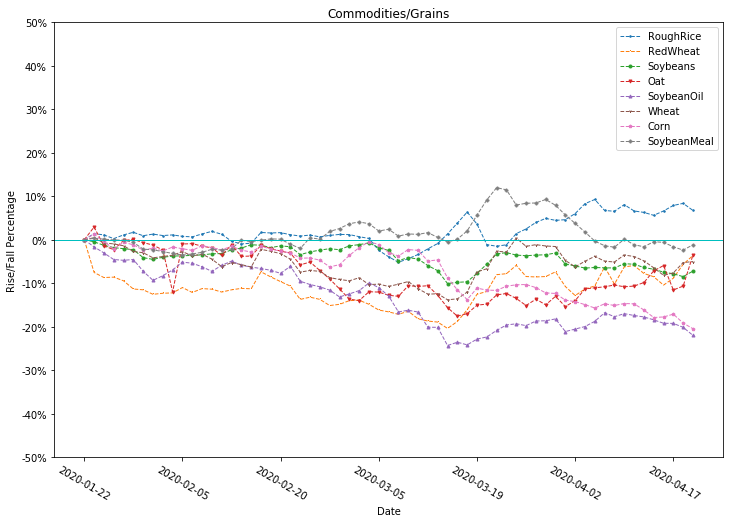

In [9]:
PlotImage(grains_dir, date)

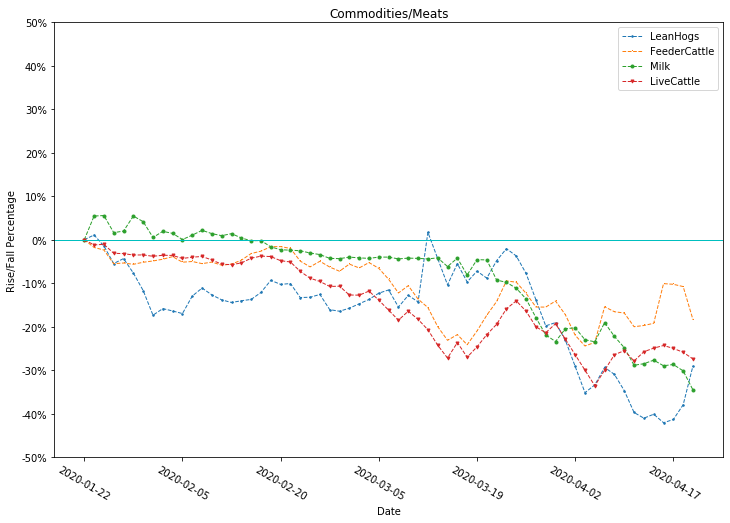

In [10]:
PlotImage(meats_dir, date)

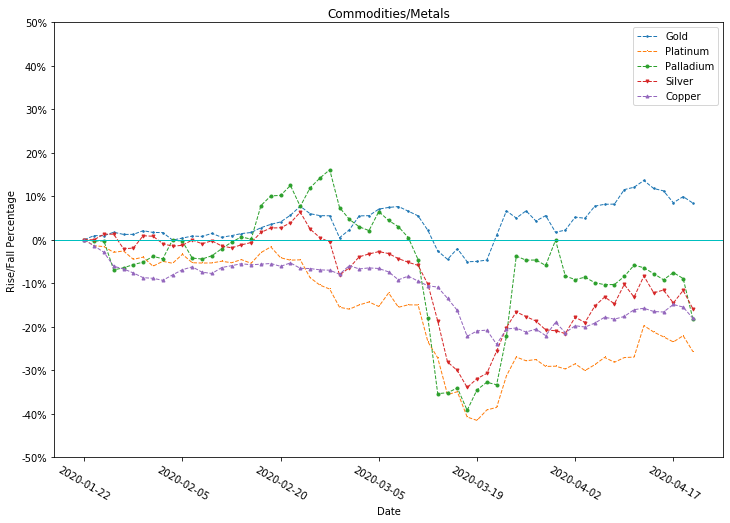

In [11]:
PlotImage(metals_dir, date)

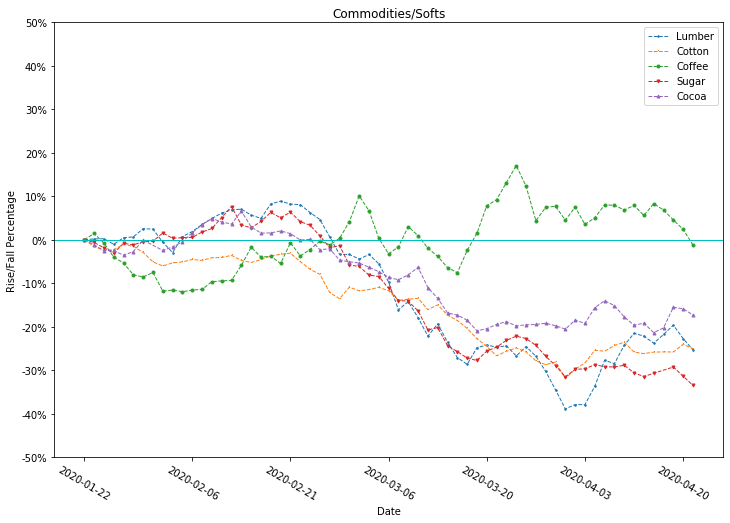

In [12]:
PlotImage(softs_dir, date)

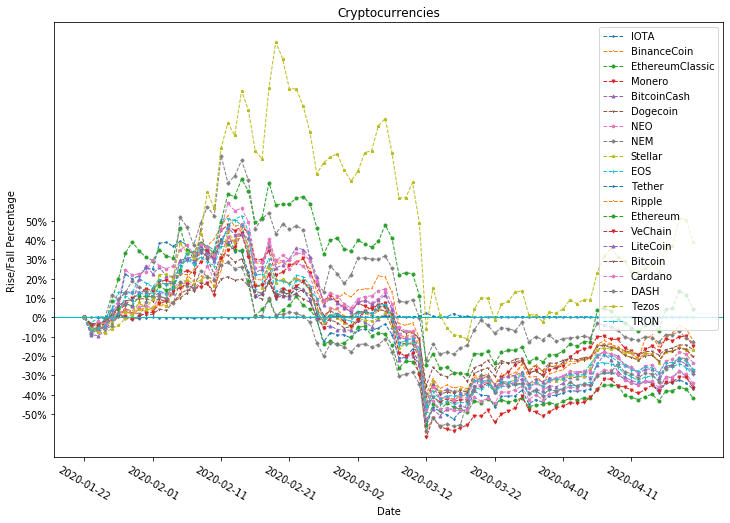

In [13]:
PlotImage(crypto_dir, date)

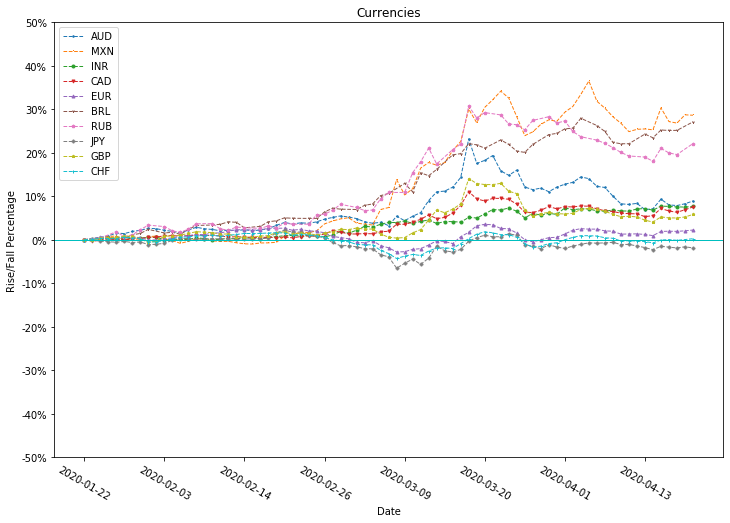

In [14]:
PlotImage(currencies_dir, date)

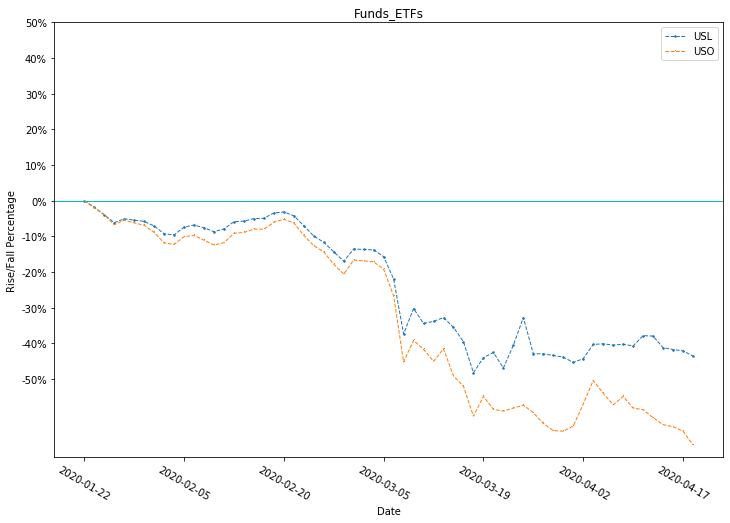

In [15]:
PlotImage(funds_dir, date)

In [ ]:
# CBOE

In [ ]:
# Crude Oil

In [ ]:
# NASDAQ 100